# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt

pd.set_option('display.max_columns', None)

In [39]:


def explain(sl, moves, update_f=None):
    
    n = len(moves)+1
    
    fig, axes = plt.subplots(n,1, figsize=(20,n*2.5))
    axes = np.ravel(axes)
    axi = 0

    for move in moves:
        s = sl.rmove(move, update=True if update_f is None else False )
        plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
        display(sl.params); 
        print('---')
        if update_f:
            update_f(sl, s)
            
    plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
    display(sl.params); 
    print('---')

0.3002|[0        250↗   501@5000  ↘250        0]
0.3002|[0       -250↗  -501@5000  ↘-250       0]
0.3002|[0        250↗   751@5000  ↘0       5000]
0.1501|[5000       0↗   500@5000  ↘0       5000]
0.2502|[5000       0↗   751@5000  ↘250     5000]
0.2502|[5000       0↗   751@5000  ↘250        0]

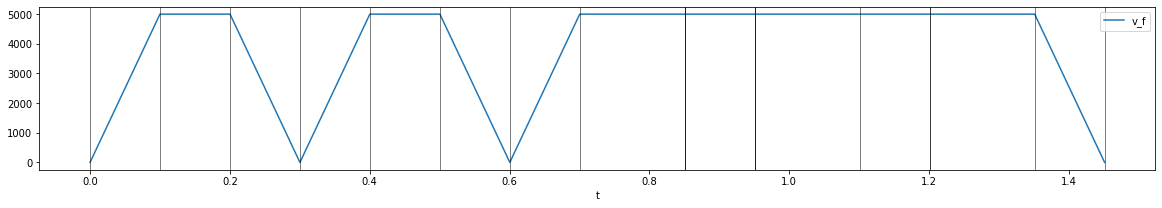

In [40]:
def run(joints, moves):
    sl = SegmentList(joints)
    
    for move in moves:
        sl.rmove(move)
        
    return sl

x = 1000 + 1
sl = run([Joint(5_000, 50_000)],( [x], [-x], [x], [x/2], [x],[x] ))
plot_segment_list(sl.dataframe)
sl

[0.7, 0.65]
[0.7, 0.6]
[0.65, 0.6]
[0.3, 0.6]
[0.65, 0.65]
[0.65, 0.65]


0.7000|[0        250↗  2500@5000  ↘250        0] [0        250↗  2750@5000  ↘0       5000]
0.7000|[0       -250↗ -2500@5000  ↘-250       0] [5000       0↗  3000@5000  ↘0       5000]
0.7000|[0        250↗  2750@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000]
0.6500|[5000       0↗  1500@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000]
0.6500|[5000       0↗  2750@5000  ↘250     5000] [5000       0↗  2750@5000  ↘250     5000]
0.6500|[5000       0↗  2750@5000  ↘250        0] [5000       0↗  2750@5000  ↘250        0]

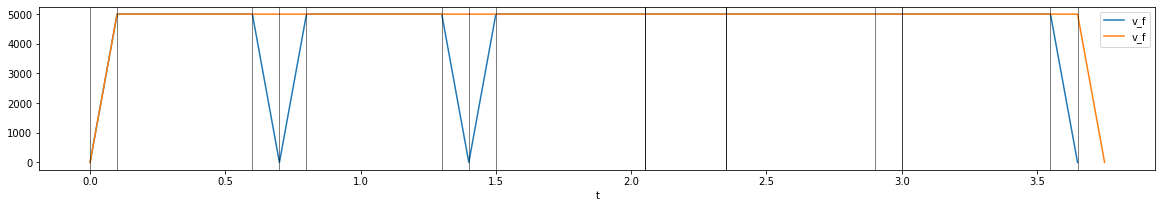

In [46]:
x = 3000
sl = run([Joint(5_000, 50_000),Joint(5_000, 50_000)],( [x,x], [-x,x], [x,x], [x/2,x], [x,x],[x,x] ))
plot_segment_list(sl.dataframe)

for s in sl:
    print([js.t for js in s])
    

sl

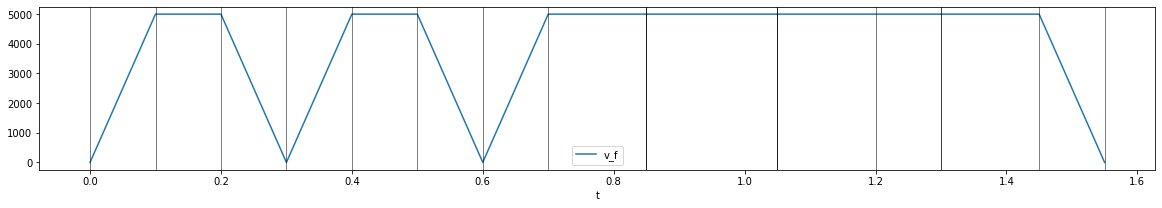

In [31]:
class TestSL(SegmentList):
    ...

sl = TestSL([Joint(5_000, 50_000)])
x = 1000

sl.rmove([x])
sl.rmove([-x])
sl.rmove([x])
sl.rmove([1000])
sl.rmove([x])
sl.rmove([x])

plot_segment_list(sl.dataframe)


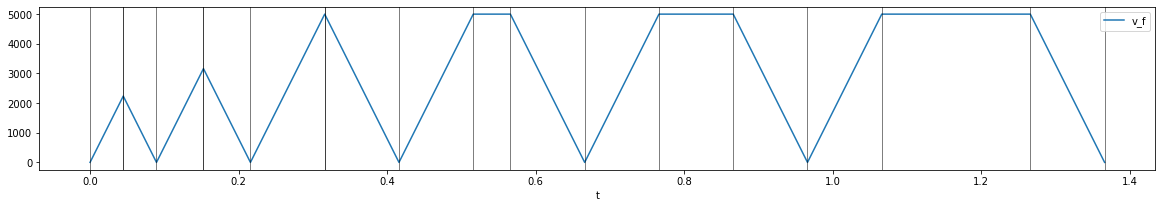

In [34]:
class TestSL(SegmentList):
    ...

sl = TestSL([Joint(5_000, 50_000)])

sl.rmove([100])
sl.rmove([-200])
sl.rmove([500])
sl.rmove([-750])
sl.rmove([1000])
sl.rmove([-1500])

plot_segment_list(sl.dataframe)

        

0.7 [0.7, 0.7]
0.7 [0.7, 0.7]
0.7 [0.7, 0.7]
0.65 [0.65, 0.65]
0.65 [0.65, 0.65]
0.65 [0.65, 0.65]


(0.5606751882688548, 0.65, 0.65)

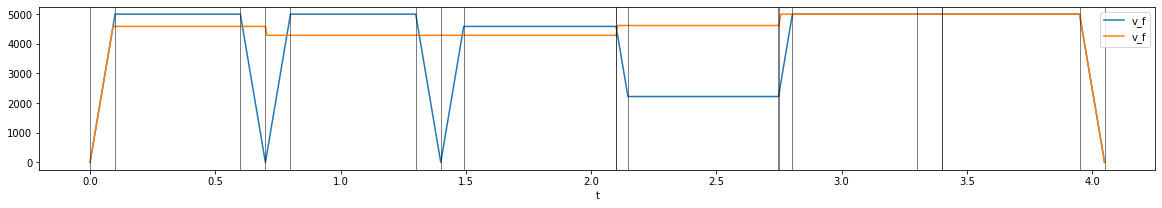

In [54]:
x = 3000
sl = run([Joint(5_000, 50_000),Joint(5_000, 50_000)],
         ( [x,x], [-x,x], [x,x], [x/2,x], [x,x],[x,x] ))
plot_segment_list(sl.dataframe)

for s in sl:
    print(s.t, [js.t for js in s])

sl

from trajectory.planner import accel_tx

js = sl[4,0]

def compress(self):
    pass

def adjust_time(self):
    pass

compressed_time(js)
    

,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,0.302,1010,0.302,1,0,0,250.0,0.1,510.0,0.102,5000,5000,250.0,0.1,0,0,1010,1010,0.302
1,0,1,0.302,1010,0.252,1,0,0,250.0,0.1,760.0,0.152,5000,5000,0.0,0.0,5000,5000,1010,1010,0.252
2,1,0,0.252,0,0.252,0,0,0,0.0,0.0,0.0,0.252,0,0,0.0,0.0,0,0,0,0,0.000
3,1,1,0.252,1010,0.252,1,5000,5000,0.0,0.0,760.0,0.152,5000,5000,250.0,0.1,5000,5000,1260,1010,0.202
4,2,0,0.302,1010,0.302,1,0,0,250.0,0.1,510.0,0.102,5000,5000,250.0,0.1,0,0,1010,1010,0.302
5,2,1,0.302,1010,0.252,1,5000,5000,0.0,0.0,760.0,0.152,5000,5000,250.0,0.1,0,0,1010,1010,0.252


['0/0 ubv_v0max 5000->0', '0/0 ubv_v1max 5000->0', '0/0 ubv_v0 5000->0', '0/0 ubv_v0 5000->0', '0/1 ubv_v0max 5000->0', '0/1 ubv_v1max 5000->0', '0/1 ubv_v0 5000->0', '0/1 ubv_v0 5000->0', '0/0 ubv_v1max 5000->0', '1/0 ubv_v0max 5000->0.0', '1/1 ubv_v0 5000->0', '0/1 rc_v1_change 0->5000', '1/1 rc_v1 0->5000', '0/1 rc_t_change 0.252']


,t,axis,x,v_i,v_f,ss,del_t
0,0.100,0,250.0,0.0,5000.0,a,0.100
1,0.202,0,510.0,5000.0,5000.0,c,0.102
2,0.302,0,250.0,5000.0,0.0,d,0.100
3,0.100,1,250.0,0.0,5000.0,a,0.100
4,0.252,1,760.0,5000.0,5000.0,c,0.152
5,0.252,1,0.0,5000.0,5000.0,d,0.000
6,0.302,0,0.0,0.0,0.0,a,0.000
7,0.554,0,0.0,0.0,0.0,c,0.252
8,0.554,0,0.0,0.0,0.0,d,0.000
9,0.252,1,0.0,5000.0,5000.0,a,0.000


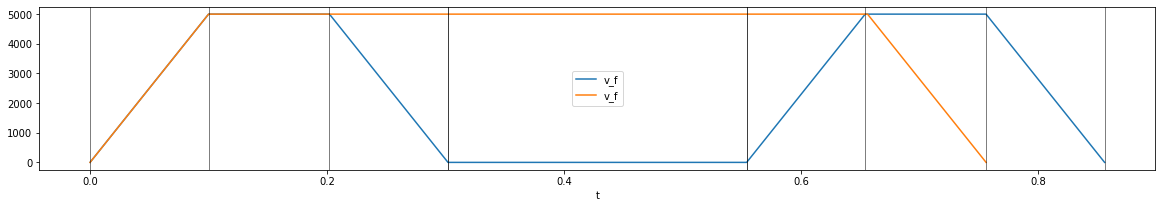

In [35]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])
x = 1000+10

sl.rmove([x,x])
sl.rmove([0,x])
sl.rmove([x,x])
display(sl.params)


plot_segment_list(sl.dataframe)
print(sl[0].updates)
display(sl.dataframe)

In [38]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x,x]);
sl.rmove([100,x]);
sl.rmove([x,x]);
sl.rmove([0,x]);
sl.rmove([x,x]);


plot_segment_list(sl.dataframe)
t = sl.params
t[t.js == 0]

ZeroDivisionError: float division by zero

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 501



sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 499


sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
sl = SegmentList([Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(5,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

In [ ]:
from trajectory.planner import accel_x

js = sl.segments[0].joint_segments[0]

def min_t(self):
    print(self.t, self.segment.t)
    
    v_c = self.v_c
    
    self.x_a, self.t_a = accel_x(self.v_0, v_c, self.joint.a_max)
    self.x_d, self.t_d = accel_x(v_c, self.v_1, self.joint.a_max)
    
    print(v_c, self.segment.t - self.t_a - self.t_d)
    
    
min_t(js)

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 1500

for i in range(10):
    sl.rmove([x,x])


print(sl)
plot_segment_list(sl.dataframe)

sl.reset()
sl.update(limit=None)
sl.update(limit=None)
sl.update(limit=None)

print('----')
print(sl)
plot_segment_list(sl.dataframe)


In [ ]:
js = sl.segments[1].joint_segments[0]
print(js)
(js.t_a, js.t_c, js.t_d), (js.v_0_max, js.v_0 ,js.v_c, js.v_1, js.v_1_max)

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([x/10,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)





In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)

for s in sl.segments:
    print(s.err_t, s.t, [js.t for js in s.joint_segments])


In [ ]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(9,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,-x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,0]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl)


In [ ]:
sl.dataframe.set_index(['t','axis']).sort_index().reset_index()

In [ ]:
# a = 7550 passes, 7499 does not. 
sl = SegmentList([Joint(5_000, 7_499),Joint(5_000, 7_499)])

x = 5000

sl.rmove([x,x])
sl.rmove([-x,x])
sl.rmove([x,-x])
sl.rmove([-x,x])
sl.rmove([x,x])
for i in range(10):
    sl.update()
    print(round(sl.err_t,5), round(sum([s.err_t for s in sl.segments]), 5), [ (s.n_updates, s.err_t) for s in sl.segments])
    print('===')

plot_segment_list(sl.dataframe)

In [ ]:
print([s.err_t for s in sl.segments])

In [ ]:
sl.rmove([x,x])
sl.update()
sl.update() 
sl.update()
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 2000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])
sl.rmove([x,x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x/2, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x, x])
sl.rmove([0, x])
sl.rmove([x, x])
sl.rmove([-x, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
def max_v_0(x, a):
    """Return the maximum v_0 for a segment of distance x such that  we can
    decelerate and not exceede distance x"""

    # decel time t = v0/a
    # x = (v_i+v_f)/2 * t -> v0/2 * t
    # x = v0/2 * v0/a
    # x = v0^2/2a
    return sqrt(2 * a * x)

max_v_0(100,50_000)